In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

train_df = pd.read_excel("La_sen_phan_loai.xlsx", "UV-Vis_train")
test_df = pd.read_excel("La_sen_phan_loai.xlsx", "UV-Vis_test")
X_train = train_df.iloc[:, 1:]
X_test = test_df.iloc[:, 1:]
y_train = train_df.iloc[:, 0]
y_test = test_df.iloc[:, 0]

In [222]:
y_train

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    2
11    2
12    2
13    2
14    2
15    3
16    3
17    3
18    3
19    3
20    3
21    3
22    3
Name: Class, dtype: int64

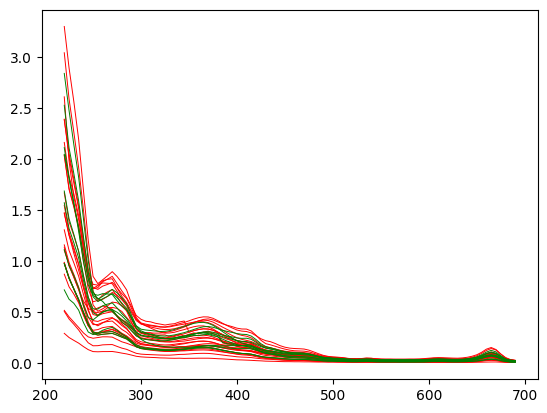

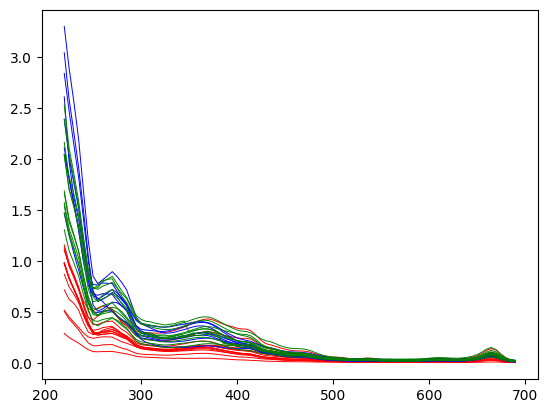

In [205]:
plt.plot(X_train.T, "r", linewidth=0.7)
plt.plot(X_test.T, "g", linewidth=0.7)
plt.show()

full_df = pd.concat((train_df, test_df), axis=0)
unq = np.unique(y_train)
colors = ['red', 'blue', 'green']
cmap = ListedColormap(colors)
for id,label in enumerate(unq):
    df = full_df.loc[full_df["Class"]==label].iloc[:, 1:]
    plt.plot(df.T, c=cmap(id), linewidth=0.7)
plt.show()

In [206]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

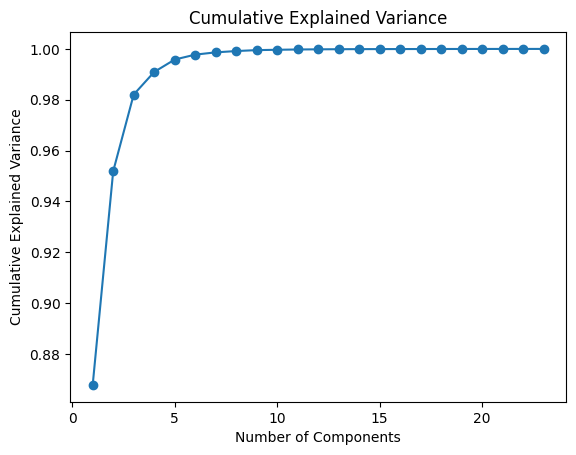

In [207]:
pca = PCA()
pca.fit(X_train_scaled)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

In [208]:
# # %matplotlib qt
# pca = PCA(3)
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)
# X_val_pca = pca.transform(X_val_scaled)


# fig = plt.figure(figsize = (20, 20))
# ax = plt.axes(projection ="3d")
   
# # Add x, y gridlines 
# ax.grid(b = True, color ='grey', 
#         linestyle ='-.', linewidth = 0.3, 
#         alpha = 0.2) 
# ax.scatter3D(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2],
#                     alpha = 0.9,
#                     c = y_train, 
#                     edgecolors = 'k', 
#                     marker ='o',
#                     s=100)
# ax.scatter3D(X_test_pca[:, 0], X_test_pca[:, 1], X_test_pca[:, 2],
#                     alpha = 0.7,
#                     c = y_test, 
#                     edgecolors = 'k', 
#                     marker ='o',
#                     s=100)
# plt.title("3PC scatter plot")
# ax.set_xlabel('PC1', fontweight ='bold') 
# ax.set_ylabel('PC2', fontweight ='bold') 
# ax.set_zlabel('PC3', fontweight ='bold')
# plt.show()

In [209]:
pca = PCA(3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
0.7


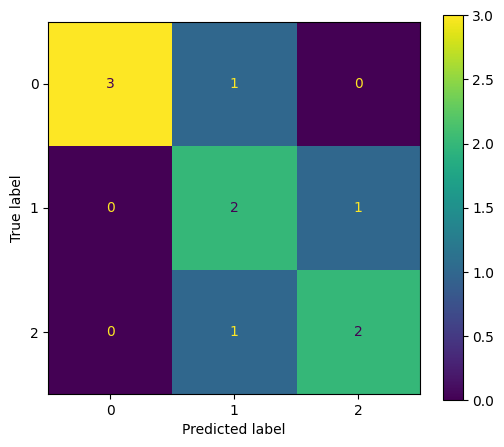

In [221]:
pca = PCA()
tree = DecisionTreeClassifier()
pipe = Pipeline(steps=[('pca', pca), ('tree', tree)])

param_grid = {
    'pca__n_components': [1,2,3,4,5,6,7,8,9,10],
    'tree__max_depth' : [4, 5, 6, 7, 8, 9],
}
search = GridSearchCV(pipe, param_grid, cv=5, verbose=True, scoring='accuracy')
search.fit(X_train_scaled, y_train)

model = search.best_estimator_
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,5))
cmd.plot(ax=ax)

In [212]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.1, max_depth=5, max_features='sqrt',
                       random_state=1024)

In [213]:
final_model = grid_search.best_estimator_
clf = final_model

In [214]:
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
accuracy_score(y_test, y_pred)

0.7

In [215]:
clf = RandomForestClassifier()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
accuracy_score(y_test, y_pred)

0.8